Done. You have the matrices PP QQ  RR  SS  WW.
  
Done. You have the matrices "Response" and "Response_named" 
which contain the models simulated reponses to
given values for the exogenous stochastic processes.
  
  
Here are the UNFILTERED SIMULATED series.
Total Simulation Length =  500
Number of Initial Values Discarded =  100
  
Trend and cycle components have been computed.
The matrices Mat_trend, Mat_trend_named,
Mat_cycle, Mat_cycle_named can be downloaded
to excel or used to make plots.
  
Detrending Filter Used:  Hodrick-Prescott
  
  
Simulated Series, Trend Component, Cyclical Comoponent
x-axis: time periods,  y-axis:  %-deviation from steady state
  


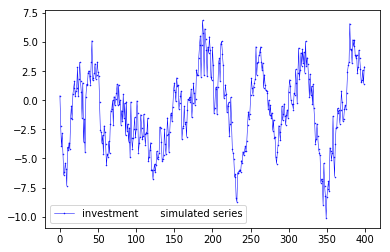

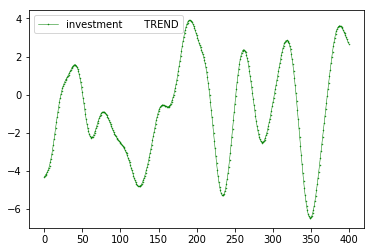

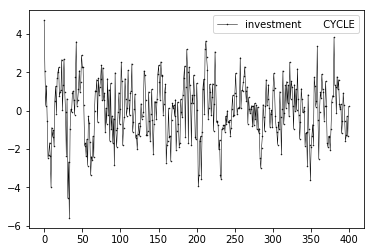

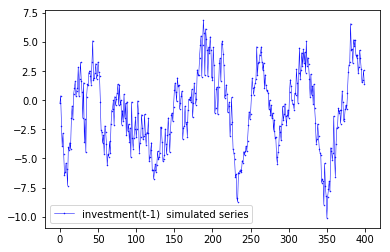

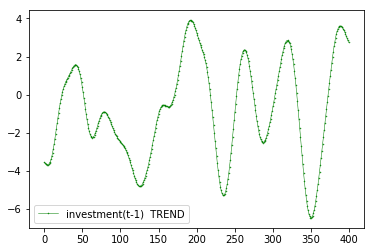

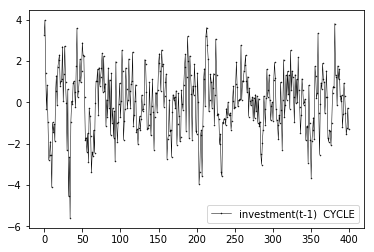

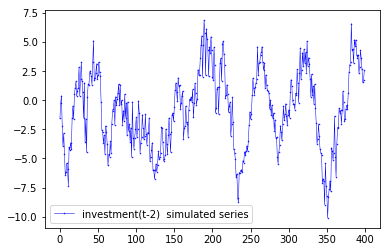

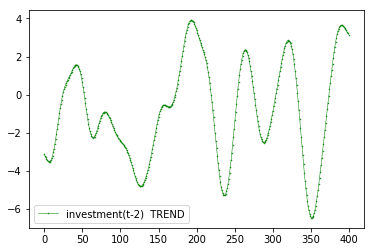

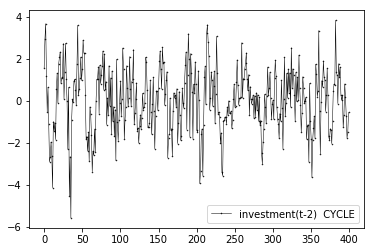

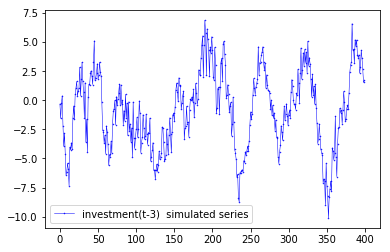

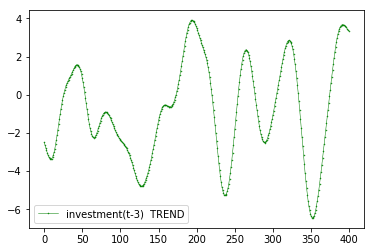

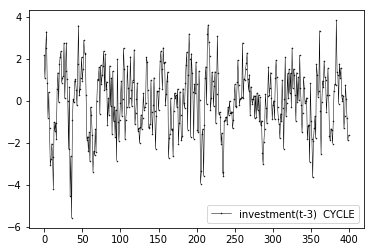

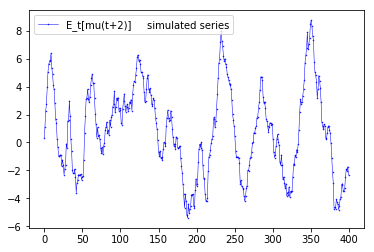

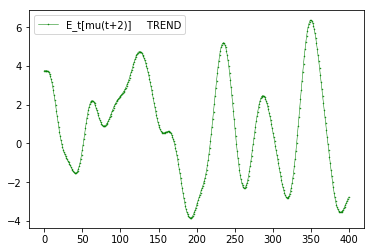

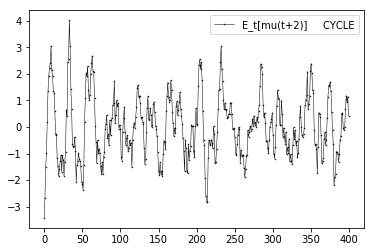

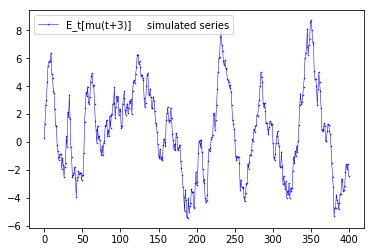

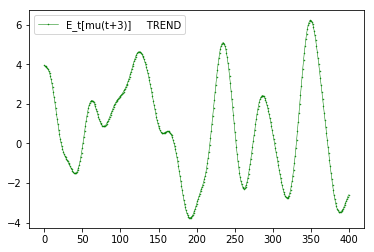

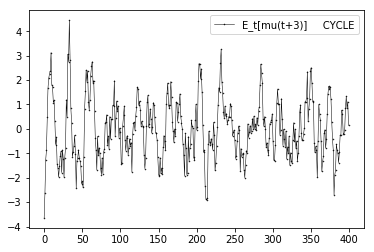

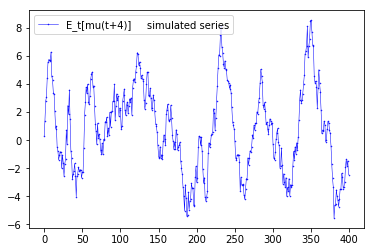

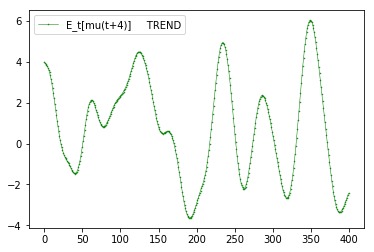

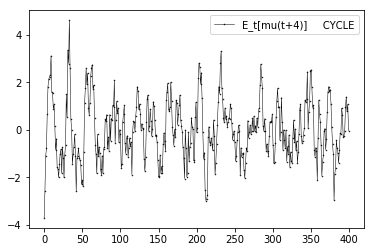

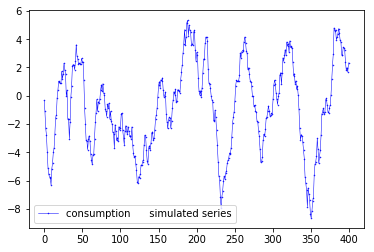

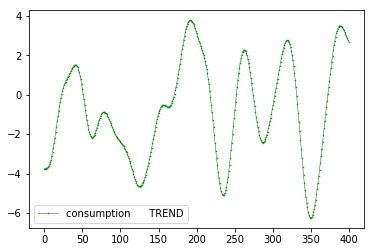

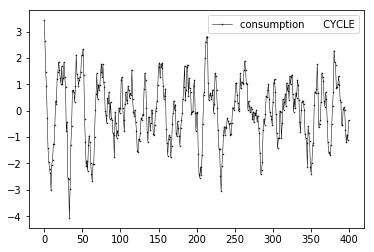

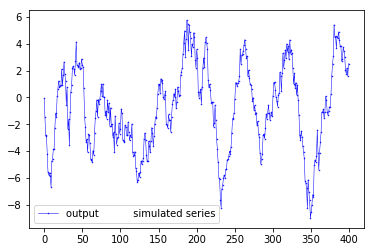

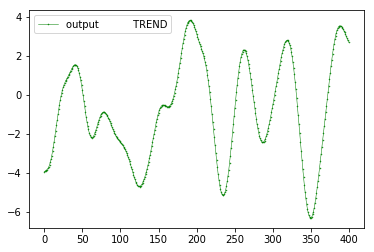

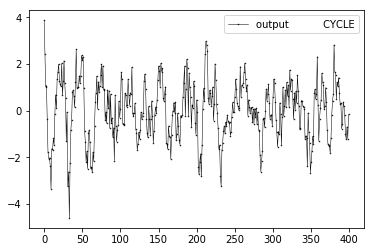

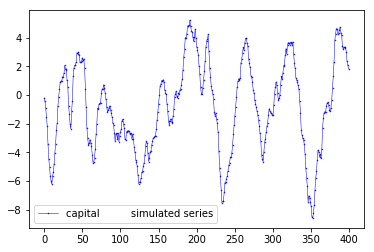

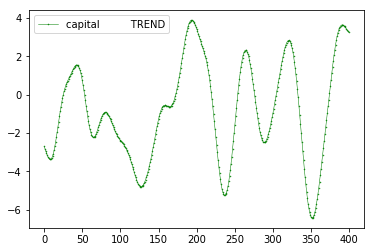

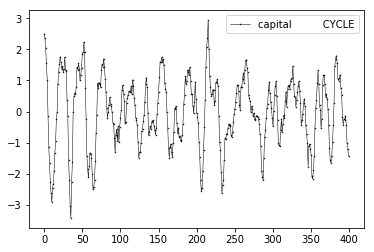

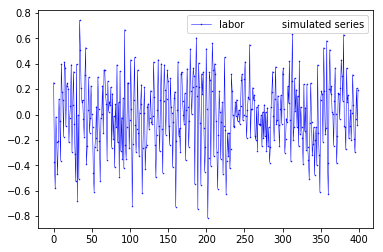

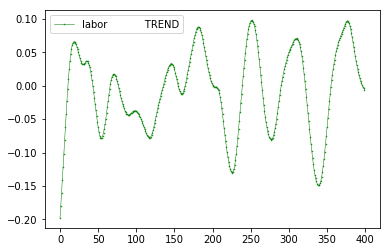

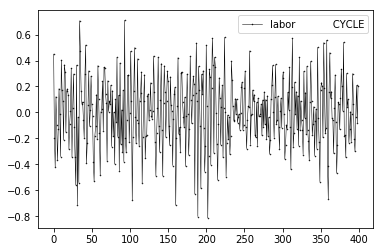

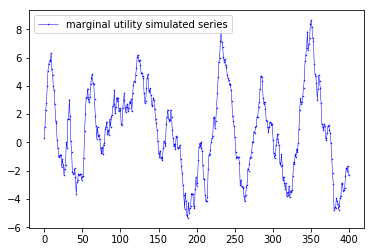

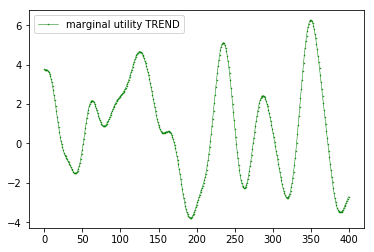

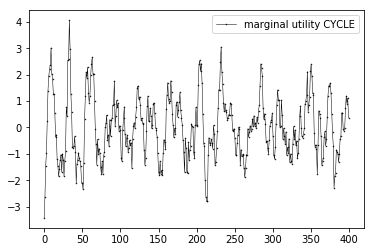

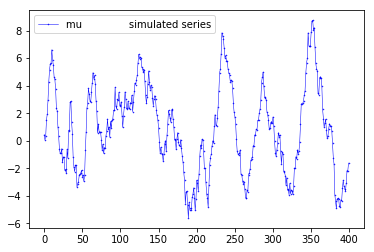

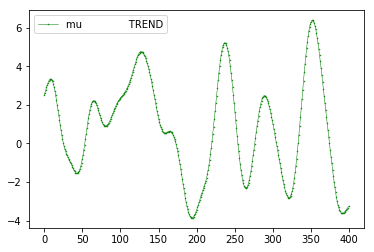

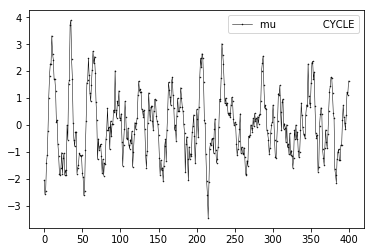

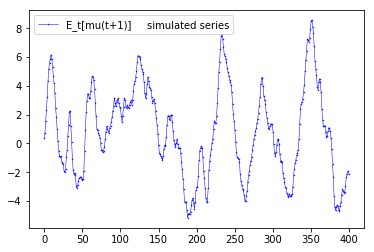

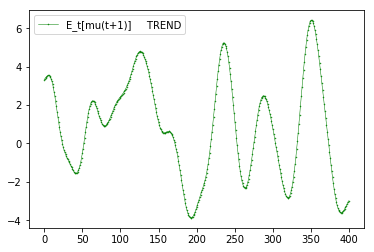

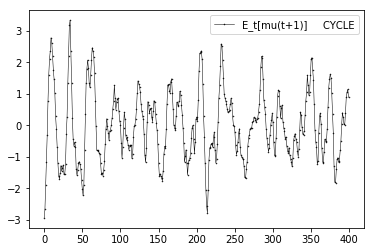

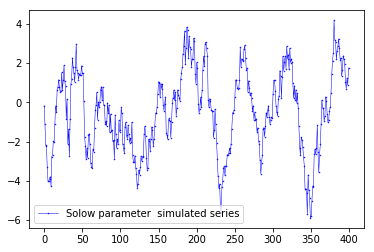

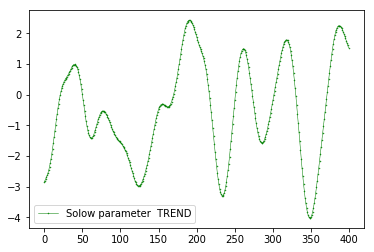

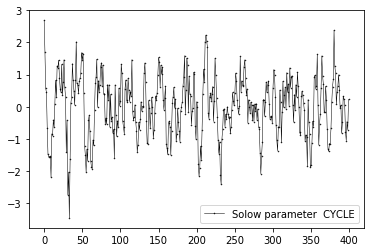

  
  
Shocks used in simulation
  


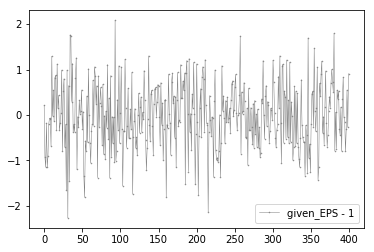

   
   
Mat_trend_named = 
[['investment      ' '-4.315805491707438' '-4.261365467963294' ...
  '2.8944836572683' '2.786690755174742' '2.6790293533197187']
 ['investment(t-1) ' '-3.5465511072917293' '-3.5839155820983466' ...
  '2.9660657758535582' '2.8533349076558348' '2.7397905908871842']
 ['investment(t-2) ' '-3.117021907078729' '-3.1980949291433793' ...
  '3.2974117294110172' '3.220608215782006' '3.143455078091869']
 ...
 ['mu              ' '2.49131643567459' '2.6311984189851882' ...
  '-3.3846758677608237' '-3.3207505902549483' '-3.255803722258554']
 ['E_t[mu(t+1)]    ' '3.323059963826921' '3.379144229199079' ...
  '-3.1631991182780093' '-3.0746847636153887' '-2.985614938906335']
 ['Solow parameter ' '-2.8560901288039853' '-2.8040559281750355' ...
  '1.680610063230408' '1.6020399119903062' '1.5236123563522177']]
   
Mat_cycle_named = 
[['investment      ' '4.707766044333224' '2.086180101237174' ...
  '-0.31042707697781324' '-1.3484178777712768' '0.2104003816551696']
 ['investment(

,0,1,2,3
0,Variables,Mean,Std Deviation,Coeff of Variation
1,investment,1.0868306254963044e-13,1.502674607041034,13826207798982.781
2,investment(t-1),3.770317391627032e-14,1.5095922346165191,40038863517669.91
3,investment(t-2),7.06124048122092e-14,1.5099496676677706,21383631837542.14
4,investment(t-3),9.18265463667467e-14,1.5117143424670452,16462715873353.207
5,E_t[mu(t+2)],-7.069234086998222e-14,1.1715068043202959,-16571905667615.934
6,E_t[mu(t+3)],-5.78137537843304e-14,1.2300028707031958,-21275263932724.79
7,E_t[mu(t+4)],-4.255928942598075e-14,1.2560497378857571,-29512939591491.133
8,consumption,4.113820395446055e-14,1.1668472146561522,28364077730467.684
9,output,8.240075288767912e-14,1.24211585676913,15074083831033.246


 
 
Table 02:  Cross Correlation with Output, Standard Deviation Relative to Output
 


,0,1,2
0,Variables,Correlation with GDP,Std Dev Relative to GDP
1,investment,0.952108581657,1.209770086141275
2,investment(t-1),0.688951929381098,1.2153393150805776
3,investment(t-2),0.5375944339929752,1.2156270765235246
4,investment(t-3),0.40266060693771955,1.217047777168845
5,E_t[mu(t+2)],-0.9705634298529876,0.943154213784457
6,E_t[mu(t+3)],-0.9897054939073301,0.9902481028642197
7,E_t[mu(t+4)],-0.9894678350086272,1.0112178594618948
8,consumption,0.9770252585678074,0.9394028812185369
9,output,1.0,1.0


 
  
Table 03:  Autocorrelations  (Not Cross Autocorrelations)
 


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,leads (+t) lags (-t),investment,investment(t-1),investment(t-2),investment(t-3),E_t[mu(t+2)],E_t[mu(t+3)],E_t[mu(t+4)],consumption,output,capital,labor,marginal utility,mu,E_t[mu(t+1)],Solow parameter
1,5.0,0.4790350564479365,0.4882126965436364,0.4908766108304843,0.49072583441226714,0.8661189397098215,0.8031774365188772,0.7623364292396674,0.8534501843312938,0.7377281387703981,0.9243113967219297,-0.02559921694143703,0.8534501843312952,0.8479858814188472,0.9297524991334004,0.6929413593494425
2,4.0,0.3047449281829698,0.31106955134441533,0.3151302416518759,0.31865986596355556,0.6816303577181713,0.602493806137307,0.5514057931950752,0.6656540150724279,0.565653541793453,0.7698723824841486,-0.31440591448728744,0.6656540150724309,0.663433762522882,0.7628130028058927,0.4649846398916985
3,3.0,0.2385594023467987,0.2409019459423177,0.243006855994872,0.25040012986129456,0.4775069031876015,0.39738393500446173,0.34582155227390615,0.46129951742846,0.40362980430743123,0.5703367815342665,-0.19296569389972543,0.4612995174284643,0.46148783756396317,0.5605047983020139,0.2587981947257543
4,2.0,0.318284469440224,0.3263223512671224,0.3267305489100236,0.33113370037513795,0.2983021744608866,0.24107959125638684,0.20450363389335494,0.28667695574656554,0.29639615828158045,0.35755036204239055,0.3618927200583817,0.28667695574657087,0.29330328542867606,0.359034448693549,0.14309279568247713
5,1.0,0.03597957568630617,0.04021952775515539,0.045214917214765615,0.04764120332147138,0.13091005746596016,0.0899814415243932,0.0638924998383434,0.12257940917496732,0.09558676332742172,0.17634563680119036,-0.07917700998242024,0.12257940917497341,0.12969777141486988,0.17485499240225325,0.0201694319794424
6,0.0,0.9999999999999999,1.0,1.0,1.0,1.0,1.0,0.9999999999999998,1.0,1.0,1.0,1.0,1.0,0.9999999999999998,1.0,1.0
7,-1.0,0.4790350564479365,0.48821269654363647,0.4908766108304844,0.4907258344122672,0.8661189397098213,0.8031774365188773,0.7623364292396673,0.8534501843312939,0.7377281387703981,0.9243113967219296,-0.025599216941437037,0.853450184331295,0.8479858814188473,0.9297524991334004,0.6929413593494425
8,-2.0,0.3047449281829697,0.3110695513444154,0.31513024165187586,0.31865986596355556,0.6816303577181713,0.602493806137307,0.5514057931950752,0.6656540150724278,0.565653541793453,0.7698723824841487,-0.31440591448728744,0.6656540150724309,0.6634337625228821,0.7628130028058926,0.4649846398916986
9,-3.0,0.23855940234679868,0.24090194594231773,0.243006855994872,0.25040012986129456,0.4775069031876015,0.3973839350044617,0.34582155227390615,0.46129951742846004,0.4036298043074312,0.5703367815342664,-0.19296569389972543,0.4612995174284643,0.46148783756396317,0.560504798302014,0.2587981947257544


 
 
  
Table 04:  Cross Autocorrelation with Output
 


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,leads (+t) lags (-t),investment,investment(t-1),investment(t-2),investment(t-3),E_t[mu(t+2)],E_t[mu(t+3)],E_t[mu(t+4)],consumption,output,capital,labor,marginal utility,mu,E_t[mu(t+1)],Solow parameter
1,5.0,0.6823313592891007,0.5347454710222184,0.3953713045939496,0.3597209942107362,-0.7299679747477762,-0.744458588473125,-0.7443800269996972,0.7348399078265082,0.7377281387703981,0.49173931514677094,0.21956357684987457,-0.7348399078265095,-0.4059053089915871,-0.654017217731362,0.7323443192881
2,4.0,0.5244606931803603,0.3891405239120035,0.35109162863095955,0.15264855499314778,-0.5559285587282993,-0.5795657011032551,-0.5863827406481239,0.5624773121125501,0.565653541793453,0.3141668375539128,0.17230821771374064,-0.5624773121125523,-0.25206625430224716,-0.4746737983445001,0.5877692118628275
3,3.0,0.37991448569305925,0.3450885724483586,0.14483079944004226,0.025731860249419702,-0.3897029990513549,-0.4203257349711047,-0.4327808712011797,0.39745751547768166,0.40362980430743123,0.1562828703625268,0.1405736055464259,-0.3974575154776845,-0.11320866090544368,-0.30667802043486825,0.44554115631548386
4,2.0,0.33291827275368024,0.1372963636707675,0.01594495090193177,-0.06706634410462875,-0.24297282069500528,-0.2903978866639942,-0.3136422411314433,0.25418411694995907,0.29639615828158045,0.0030281410680935528,0.2664815504204057,-0.25418411694996257,0.05651039497598965,-0.13878723264449372,0.3453509692135038
5,1.0,0.1290870012655596,0.010862988780887897,-0.07341714699835128,-0.08627461883388915,-0.058397784979112764,-0.0953205094764924,-0.11486193484905464,0.06683513230607963,0.09558676332742172,-0.1021061746895649,0.1515295901566667,-0.06683513230608386,0.12807126935078417,0.013834131273174125,0.14391412319660227
6,0.0,0.952108581657,0.688951929381098,0.5375944339929752,0.40266060693771955,-0.9705634298529876,-0.9897054939073301,-0.9894678350086272,0.9770252585678074,1.0,0.6750066259389101,0.37972516942237816,-0.9770252585678072,-0.5397691260970996,-0.8695317326621114,0.9731610437533412
7,-1.0,0.5104047052428928,0.9502689354957485,0.6894386770666789,0.5368909861834105,-0.8673078568980662,-0.7968006915385146,-0.7484810017634319,0.8534159948759684,0.7377281387703981,0.8718456158977141,-0.29823560918284503,-0.8534159948759684,-0.8699968675720732,-0.9376084903924037,0.6598043710052136
8,-2.0,0.35391431007206564,0.5071111516361299,0.9488254571621957,0.6883415726778721,-0.702770802848021,-0.5983382774847822,-0.5333500913717877,0.6808767748807653,0.565653541793453,0.9080241604513004,-0.3367639296331527,-0.6808767748807661,-0.9122510267788793,-0.8466071779083146,0.4219821728413808
9,-3.0,0.2681381117189436,0.3500215992843904,0.5047780495841917,0.9466010145307234,-0.49968989202704045,-0.3864235827450127,-0.3190228204337652,0.4753221729940577,0.4036298043074312,0.8452704703361688,-0.19333376610080627,-0.47532217299405893,-0.8232986620945261,-0.6744951409140778,0.20752892394824493


In [2]:
#  Uhlig's Exampl3.m
#  G. Hansen Indivisible Labor and Business Cycle (JME, 1985)
#   RBC Model with Time-to-Decay and Echo Effects

import numpy as np

N_bar     = 1.0/3
Z_bar     = 1
rho       = .36
R_bar     = 1.01
eta       = 1.0
psi       = .95
sigma_sigma = .712
p_echo    = 4

betta   = 1.0/R_bar
YK_bar  = (1- betta)/((1 - betta**p_echo)*betta*rho)
K_bar   = (YK_bar / Z_bar)**(1.0/(rho-1)) * N_bar
I_bar   = K_bar / p_echo
Y_bar   = YK_bar * K_bar
C_bar   = Y_bar - I_bar
Lam_bar = C_bar**(- eta)
Mu_bar  = rho*Lam_bar*YK_bar
A       = Lam_bar * (1 - rho) * Y_bar/N_bar


VARNAMES = ['investment      ',
            'investment(t-1) ',
            'investment(t-2) ',
            'investment(t-3) ',
            'E_t[mu(t+2)]    ',
            'E_t[mu(t+3)]    ',
            'E_t[mu(t+4)]    ',
            'consumption     ',
            'output          ',
            'capital         ',
            'labor           ',
            'marginal utility',
            'mu              ',
            'E_t[mu(t+1)]    ',
            'Solow parameter ']

AA = np.vstack(([ -I_bar, 0, 0, 0, 0, 0, 0], 
                          [0, 0, 0, 0, 0, 0, 0],   
                          [0, 0, 0, 0, 0, 0, 0],   
                          [0, 0, 0, 0, 0, 0, 0],   
                          [0, 0, 0, 0, betta**2, betta**3, betta**4], 
                          [0, 0, 0, 0, 0, 0, 0],   
                          [0, 0, 0, 0, 0, 0, 0],   
                          [0, 1, 0, 0, 0, 0, 0],   
                          [0, 0, 1, 0, 0, 0, 0],   
                          [0, 0, 0, 1, 0, 0, 0]))


BB = np.vstack(([0, 0, 0, 0, 0, 0, 0], 
                          [1, 1, 1, 1, 0, 0, 0],  
                          [0, 0, 0, 0, 0, 0, 0],   
                          [0, 0, 0, 0, 0, 0, 0],  
                          [0, 0, 0, 0, 0, 0, 0], 
                          [0, 0, 0, 0, 0, 0, 0],   
                          [0, 0, 0, 0, 0, 0, 0],  
                         [-1, 0, 0, 0, 0, 0, 0],  
                          [0,-1, 0, 0, 0, 0, 0],   
                          [0, 0,-1, 0, 0, 0, 0]))

CC = np.vstack(([ -C_bar, Y_bar, 0, 0, 0, 0, 0],
                         [0, 0,-p_echo, 0, 0, 0, 0], 
                         [0, -1, rho, (1-rho), 0, 0, 0],            
                         [0, 1, 0, -1, 1, 0,  0],    
                         [0, 0, 0, 0, (-Lam_bar/Mu_bar), 0, betta],           
                         [0, 1, -1, 0, 1, -1, 0],
                         [eta, 0, 0, 0, 1, 0, 0],    
                         [0, 0, 0, 0, 0, 0, 0],         
                         [0, 0, 0, 0, 0, 0, 0],        
                         [0, 0, 0, 0, 0, 0, 0] ))   

DD = np.vstack(([0],
           [0],
           [1],
           [0],
           [0],
           [0],
           [0],
           [0],
           [0],
           [0]))

FF = np.vstack(([0, 0, 0, 0, 0, 0, 0],
                          [0, 0, 0, 0, 0, 0, 0],
                          [0, 0, 0, 0, -1, 0, 0],
                          [0, 0, 0, 0, 0,-1, 0]))

GG = np.vstack(([0, 0, 0, 0, 0, 0, 0],
                          [0, 0, 0, 0, 1, 0, 0],
                          [0, 0, 0, 0, 0, 1, 0],
                          [0, 0, 0, 0, 0, 0, 1]))

HH = np.vstack(([0, 0, 0, 0, 0, 0, 0],
                          [0, 0, 0, 0, 0, 0, 0],
                          [0, 0, 0, 0, 0, 0, 0],
                          [0, 0, 0, 0, 0, 0, 0]))

JJ = np.vstack(([0, 0, 0, 0, 0, -1, 0],
                          [0, 0, 0, 0, 0, 0, -1],
                          [0, 0, 0, 0, 0, 0, 0],
                          [0, 0, 0, 0, 0, 0, 0]))

KK = np.vstack(([0, 0, 0, 0, 0, 0, 1],
                          [0, 0, 0, 0, 0, 0, 0],
                          [0, 0, 0, 0, 0, 0, 0],
                          [0, 0, 0, 0, 0, 0, 0]))

LL = np.vstack(([0],
                          [0],
                          [0],
                          [0]))

MM = np.vstack(([0],
                          [0],
                          [0],
                          [0]))

NN = [psi]

Sigma = [sigma_sigma**2]

Sigma_EPS = Sigma


%run Uhlig_solver_abreviated.ipynb

#print(' ')
#print('PP')
#print(PP.shape)
#print(PP)
#print(' ')
#print('RR')
#print(RR.shape)
#print(RR)
#print(' ')
#print('QQ')
#print(QQ.shape)
#print(QQ)
#print(' ')
#print('SS')
#print(SS.shape)
#print(SS)
#print(' ')


%run Uhlig_simul_rand.ipynb

%run Detrend_Filters.ipynb

##  USER INPUT:  Remember to set
##  output_index  in the Calc_Moments.ipynb
## This is different for each model

output_index = 8

%run Calc_Moments.ipynb

